<a href="https://colab.research.google.com/github/Ashebir07/Twitter_sentiment_Analysis/blob/main/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- Social media sentiment analysis is the process of using natural language processing (NLP) and machine learning techniques to analyze and classify the sentiment of social media posts, comments, and reviews. The goal of sentiment analysis is to determine whether a piece of text expresses a positive, negative, or neutral sentiment towards a particular topic or entity.

# The process of sentiment analysis involves several steps, including:

 - Data collection: Collecting social media data from various sources such as Twitter, Facebook, Instagram, and other social media platforms.

 - Preprocessing: Cleaning and preprocessing the collected data by removing irrelevant information such as URLs, hashtags, and mentions.

 - Text analysis: Analyzing the text using NLP techniques such as tokenization, part-of-speech tagging, and named entity recognition.

 - Sentiment classification: Classifying the sentiment of the text as positive, negative, or neutral using machine learning algorithms such as Naive Bayes, Support Vector Machines (SVM), and Deep Learning models.

 - Visualization: Visualizing the sentiment analysis results using graphs, charts, and other visualization techniques.

 - Social media sentiment analysis has many applications, including brand monitoring, customer feedback analysis, market research, and political analysis. It helps businesses and organizations to understand the opinions and attitudes of their customers and stakeholders towards their products, services, and brand.

In [37]:
# importing essential Python library for NLP
import nltk                                  
from nltk.corpus import twitter_samples      # sample Twitter dataset from NLTK
import matplotlib.pyplot as plt              # visualization library
import numpy as np                           # library for scientific computing and matrix operations


In [38]:
# downloads sample twitter dataset.
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


True

In [39]:
# download the stopwords for the process_tweet function
nltk.download('stopwords')

import re                                  # library for regular expression operations
import string                              # for string operations

from nltk.corpus import stopwords          # module for stop words that come with NLTK
from nltk.stem import PorterStemmer        # module for stemming
from nltk.tokenize import TweetTokenizer   # module for tokenizing strings


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Prepare the data
 - The twitter_samples contains subsets of 5,000 positive tweets, 5,000 negative tweets, and the full set of 10,000 tweets.

In [40]:
# select the set of positive and negative tweets

all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

# concatenate the lists, 1st part is the positive tweets followed by the negative
tweets = all_positive_tweets + all_negative_tweets

In [41]:
# make a numpy array representing labels of the tweets

labels = np.append(np.ones((len(all_positive_tweets))), np.zeros((len(all_negative_tweets))))

- Train test split: 20% will be in the test set, and 80% in the training set.

In [42]:
# split the data into two pieces, one for training and one for testing (validation set) 
test_pos = all_positive_tweets[4000:]
train_pos = all_positive_tweets[:4000]
test_neg = all_negative_tweets[4000:]
train_neg = all_negative_tweets[:4000]

train_x = train_pos + train_neg 
test_x = test_pos + test_neg

- Create the numpy array of positive labels and negative labels.



In [43]:
# combine positive and negative labels
train_y = np.append(np.ones((len(train_pos), 1)), np.zeros((len(train_neg), 1)), axis=0)
test_y = np.append(np.ones((len(test_pos), 1)), np.zeros((len(test_neg), 1)), axis=0)

In [44]:
# Print the shape train and test sets
print("train_y.shape = " + str(train_y.shape))
print("test_y.shape = " + str(test_y.shape))

train_y.shape = (8000, 1)
test_y.shape = (2000, 1)


# Preprocess raw text for teweeter Sentiment analysis
Data preprocessing is one of the critical steps in any machine learning project. It includes cleaning and formatting the data before feeding into a machine learning algorithm. For NLP, the preprocessing steps are comprised of the following tasks:
    
- 1. Tokenizing the string: To tokenize means to split the strings into individual words without blanks or tabs.

- 2. Lowercasing: In this step, we will also convert each word in the string to lower case.

- 3. Removing stop words and punctuation:

Since we have a Twitter dataset, we'd like to remove some substrings commonly used on the platform like the hashtag, retweet marks, and hyperlinks. We'll use the re library to perform regular expression operations on our tweet. We'll define our search pattern and use the sub() method to remove matches by substituting with an empty character (i.e. '').

- 1. Stemming: Stemming is the process of converting a word to its most general form, or stem. This helps in reducing the size of our vocabulary.
   Consider the words:
      - learn
      - learning
      - learned
      - learnt
- All these words are stemmed from its common root learn. However, in some cases, the stemming process produces words that are not correct spellings of the root word. For example, happi and sunni. That's because it chooses the most common stem for related words. For example, we can look at the set of words that comprises the different forms of happy:
      - happy
      - happiness
      - happier

We can see that the prefix happi is more commonly used. We cannot choose happ because it is the stem of unrelated words like happen.

NLTK has different modules for stemming but for this purpose I'll be using the PorterStemmer.


In [45]:
def process_tweet(tweet):
   
    stemmer = PorterStemmer()
    stopwords_english = stopwords.words('english')
    
    # remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)
    
    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    
    # remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
    
    # remove hashtags
    # only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)
    
    # tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)

    tweets_clean = []
    for word in tweet_tokens:
        if (word not in stopwords_english and  # remove stopwords
                word not in string.punctuation):  # remove punctuation
            # tweets_clean.append(word)
            stem_word = stemmer.stem(word)  # stemming word
            tweets_clean.append(stem_word)

    return tweets_clean

In [46]:
def build_freqs(tweets, ys):
    
    # tweets: a list of tweets
    # ys: an m x 1 array with the sentiment label of each tweet (either 0 or 1)
   
    yslist = np.squeeze(ys).tolist()

    freqs = {}
    for y, tweet in zip(yslist, tweets):
        for word in process_tweet(tweet):
            pair = (word, y)
            if pair in freqs:
                freqs[pair] += 1
            else:
                freqs[pair] = 1
    
    # freqs: a dictionary mapping each (word, sentiment) pair to its frequency
    
    return freqs      

# Table of word counts


In [47]:
# create frequency dictionary
freqs = build_freqs(tweets, labels)

# check data type
print(f'type(freqs) = {type(freqs)}')

# check length of the dictionary
print(f'len(freqs) = {len(freqs)}')

type(freqs) = <class 'dict'>
len(freqs) = 13065


- We will select a set of words that we would like to visualize.


In [48]:
# select some words to appear in the report. we will assume that each word is unique (i.e. no duplicates)

keys = ['happi', 'merri', 'nice', 'good', 'bad', 'sad', 'mad', 'best', 'pretti',
        '❤', ':)', ':(', '😒', '😬', '😄', '😍', '♛',
        'song', 'idea', 'power', 'play', 'magnific']

# each element consist of a sublist with this pattern: [<word>, <positive_count>, <negative_count>]
data = []

# loop through our selected words
for word in keys:
    
    # initialize positive and negative counts
    pos = 0
    neg = 0
    
    # retrieve number of positive counts
    if (word, 1) in freqs:
        pos = freqs[(word, 1)]
        
    # retrieve number of negative counts
    if (word, 0) in freqs:
        neg = freqs[(word, 0)]
        
    # append the word counts to the table
    data.append([word, pos, neg])
    
data

[['happi', 211, 25],
 ['merri', 1, 0],
 ['nice', 98, 19],
 ['good', 238, 101],
 ['bad', 18, 73],
 ['sad', 5, 123],
 ['mad', 4, 11],
 ['best', 65, 22],
 ['pretti', 20, 15],
 ['❤', 29, 21],
 [':)', 3568, 2],
 [':(', 1, 4571],
 ['😒', 1, 3],
 ['😬', 0, 2],
 ['😄', 5, 1],
 ['😍', 2, 1],
 ['♛', 0, 210],
 ['song', 22, 27],
 ['idea', 26, 10],
 ['power', 7, 6],
 ['play', 46, 48],
 ['magnific', 2, 0]]

- We can then use a scatter plot to inspect this table visually. Instead of plotting the raw counts, we will plot it in the logarithmic scale to take into account the wide discrepancies between the raw counts (e.g. :) has 3568 counts in the positive while only 2 in the negative). The red line marks the boundary between positive and negative areas. Words close to the red line can be classified as neutral.

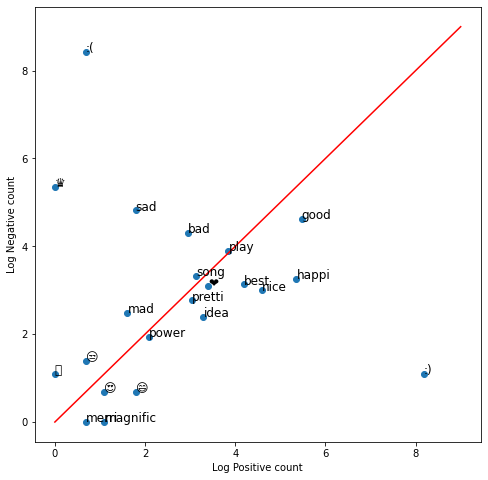

In [49]:
fig, ax = plt.subplots(figsize = (8, 8))

# convert positive raw counts to logarithmic scale. we add 1 to avoid log(0)
x = np.log([x[1] + 1 for x in data])  

# do the same for the negative counts
y = np.log([x[2] + 1 for x in data]) 

# Plot a dot for each pair of words
ax.scatter(x, y)  

# assign axis labels
plt.xlabel("Log Positive count")
plt.ylabel("Log Negative count")

# Add the word as the label at the same position as we added the points just before
for i in range(0, len(data)):
    ax.annotate(data[i][0], (x[i], y[i]), fontsize=12)

ax.plot([0, 9], [0, 9], color = 'red')  # Plot the red line that divides the 2 areas.
plt.show()

# Visualizing tweets and the Logistic Regression model


In [50]:
# create frequency dictionary
freqs = build_freqs(train_x, train_y)

# check the output
print("type(freqs) = " + str(type(freqs)))
print("len(freqs) = " + str(len(freqs.keys())))

type(freqs) = <class 'dict'>
len(freqs) = 11337


# Process tweet
- The given function process_tweet() tokenizes the tweet into individual words, removes stop words and applies stemming.

In [51]:
# test the function below
print('This is an example of a positive tweet: \n', train_x[0])
print('\nThis is an example of the processed version of the tweet: \n', process_tweet(train_x[0]))

This is an example of a positive tweet: 
 #FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)

This is an example of the processed version of the tweet: 
 ['followfriday', 'top', 'engag', 'member', 'commun', 'week', ':)']



# Part 1: Logistic regression
 - Logistic regression
     - h(z) = 11+exp−z
     - z = θ0x0+θ1x1+θ2x2+...θNxN


# Cost function and Gradient
- The cost function used for logistic regression is the average of the log loss across all training examples:
  - J(θ) = −1m∑i=1my(i)log(h(z(θ)(i)))+(1−y(i))log(1−h(z(θ)(i)))
  - m is the number of training examples
  - y(i) is the actual label of the i-th training example.
  - h(z(θ)(i)) is the model's prediction for the i-th training example.
- The loss function for a single training example is 
     - Loss=−1×(y(i)log(h(z(θ)(i)))+(1−y(i))log(1−h(z(θ)(i))))
- Note that when the model predicts 1 (h(z(θ))=1) and the label y is also 1, the loss for that training example is 0.
- Similarly, when the model predicts 0 (h(z(θ)) = 0) and the actual label is also 0, the loss for that training example is 0. 

# Update the weights
- To update the weight vector θ, we should apply gradient descent to iteratively improve our model's predictions.
- The gradient of the cost function J with respect to one of the weights θj is:
   - ∇θjJ(θ) = 1m∑i=1m(h(i)−y(i))xj
- 'i' is the index across all 'm' training examples.

- 'j' is the index of the weight θj,so xj is the feature associated with weight θj

- To update the weight θj, we adjust it by subtracting a fraction of the gradient determined by α:θj=θj−α×∇θjJ(θ)

- The learning rate α is a value that we choose to control how big a single update will be.


In [52]:
def sigmoid(z): 

    h = 1/(1+np.exp(-z))
   
    return h

In [53]:
def gradientDescent(x, y, theta, alpha, num_iters):
   
    m = x.shape[0]
    
    for i in range(0, num_iters):
        
        # get z, the dot product of x and theta
        z = np.dot(x,theta)
        
        # get the sigmoid of z
        h = sigmoid(z)
        
        # calculate the cost function
        J = -(np.dot(y.T,np.log(h))+np.dot((1-y).T,np.log(1-h)))/m

        # update the weights theta
        theta = theta - alpha*(np.dot(x.T,h-y))/m
        
    J = float(J)
    return J, theta

# Part 2: Extracting the features
- Given a list of tweets, extract the features and store them in a matrix. we should extract two features.

    - The first feature is the number of positive words in a tweet.
    - The second feature is the number of negative words in a tweet.
- Then train our logistic regression classifier on these features.
- Test the classifier on a validation set. 


In [54]:
def extract_features(tweet, freqs):
    
    # process_tweet tokenizes, stems, and removes stopwords
    word_l = process_tweet(tweet)
    
    # 3 elements in the form of a 1 x 3 vector
    x = np.zeros((1, 3)) 
    
    #bias term is set to 1
    x[0,0] = 1 
       
    # loop through each word in the list of words
    for word in word_l:
         
        if (word,1.0) in freqs:
            # increment the word count for the positive label 1
            x[0,1] += freqs[(word,1.0)]
        if(word,0.0) in freqs:
            # increment the word count for the negative label 0
            x[0,2] += freqs[(word,0.0)]
        
    return x
    

# Part 3: Training Our Model
To train the model:
  - Stack the features for all training examples into a matrix X.
  - Call gradientDescent, which we've implemented above.

*   List item
*   List item




In [55]:
# collect the features 'x' and stack them into a matrix 'X'
X = np.zeros((len(train_x), 3))
for i in range(len(train_x)):
    X[i, :]= extract_features(train_x[i], freqs)

# training labels corresponding to X
Y = train_y

print(X.shape)
print(Y.shape)

(8000, 3)
(8000, 1)


In [56]:
# Apply gradient descent
J, theta = gradientDescent(X, Y, np.zeros((3, 1)), 1e-9, 1500)

print(f"The cost after training is {J:.6f}.")
print(f"The resulting vector of weights is {[round(t, 8) for t in np.squeeze(theta)]}")


The cost after training is 0.242155.
The resulting vector of weights is [7e-08, 0.00052391, -0.00055517]


# Part 4: Visualizing tweets


Text(0, 0.5, 'Negative')

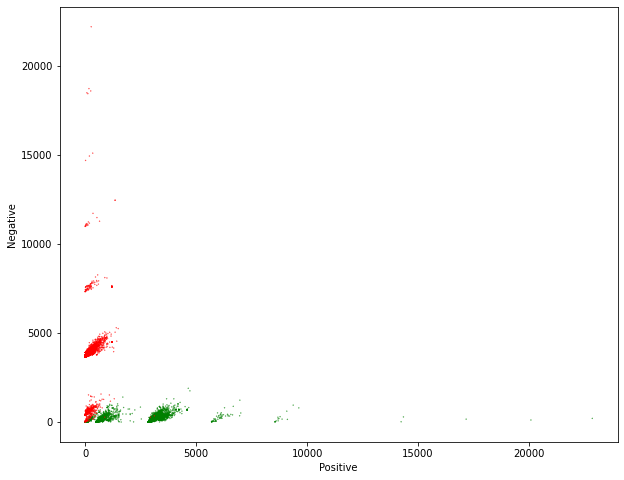

In [57]:
# Plot the samples using columns 1 and 2 of the matrix
fig, ax = plt.subplots(figsize = (10, 8))

colors = ['red', 'green']

# Color based on the sentiment Y
ax.scatter(X[:,1], X[:,2], c=[colors[int(k)] for k in Y], s = 0.1)  # Plot a dot for each pair of words
plt.xlabel("Positive")
plt.ylabel("Negative")

From the plot, it is evident that the features that we have chosen to represent tweets as numerical vectors allow an almost perfect separation between positive and negative tweets. So we can expect a very high accuracy for this model!

# Plot the model alongside the data
- We will draw a gray line to show the cutoff between the positive and negative regions. In other words, the gray line marks the line where 
     - z = θ∗x=0.
- To draw this line, we have to solve the above equation in terms of one of the independent variables.
      - z = θ∗x=0
      - x = [1,pos,neg]
      - z(θ,x) = θ0+θ1∗pos+θ2∗neg=0
      - neg = (−θ0−θ1∗pos)/θ2



In [58]:
# Equation for the separation plane
def neg(theta, pos):
    return (-theta[0] - pos * theta[1]) / theta[2]

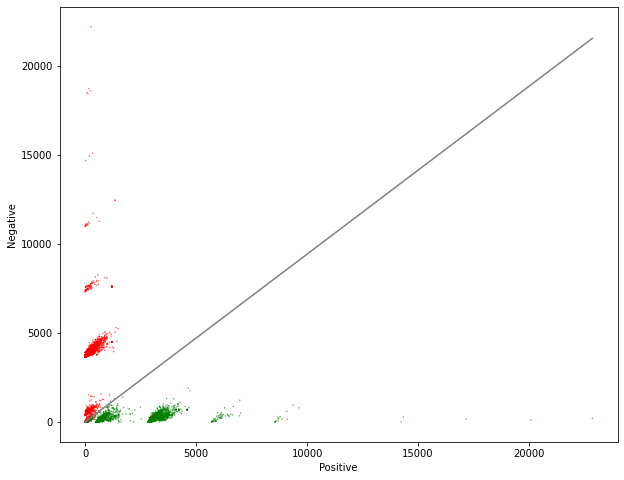

In [59]:
fig, ax = plt.subplots(figsize = (10, 8))

colors = ['red', 'green']

# Color base on the sentiment Y
ax.scatter(X[:,1], X[:,2], c=[colors[int(k)] for k in Y], s = 0.1)  # Plot a dot for each pair of words
plt.xlabel("Positive")
plt.ylabel("Negative")

# Now lets represent the logistic regression model in this chart. 
maxpos = np.max(X[:,1])           # max value in x-axis

# Plot a gray line that divides the 2 areas.
ax.plot([0,  maxpos], [neg(theta, 0),   neg(theta, maxpos)], color = 'gray') 

plt.show()

# Part 5: Test our logistic regression model


In [60]:
def predict_tweet(tweet, freqs, theta):

    # extract the features of the tweet and store it into x
    x = extract_features(tweet, freqs)
    
    # make the prediction using x and theta
    y_pred = sigmoid(np.dot(x,theta))
    
    return y_pred


In [61]:
# check our own sentiment
my_tweet = 'I love machine learning :)'
y_pred_temp = predict_tweet(my_tweet, freqs, theta)
print(y_pred_temp)

if y_pred_temp > 0.5:
    print('Positive sentiment')
else: 
    print('Negative sentiment')


[[0.83158609]]
Positive sentiment


In [62]:
def test_logistic_regression(test_x, test_y, freqs, theta):
    """ 
    test_x: a list of tweets
    test_y: (m, 1) vector with the corresponding labels for the list of tweets
    """
    
    y_hat = []
    
    for tweet in test_x:
        # get the label prediction for the tweet
        y_pred = predict_tweet(tweet, freqs, theta)
        
        if y_pred > 0.5:
            y_hat.append(1.0)
        else:
            y_hat.append(0.0)

    accuracy = np.sum(np.squeeze(test_y) == np.squeeze(np.asarray(y_hat)))/len(test_y)

    return accuracy


In [63]:
test_accuracy = test_logistic_regression(test_x, test_y, freqs, theta)
print(f"Logistic regression model's accuracy = {test_accuracy:.4f}")


Logistic regression model's accuracy = 0.9950


# Part 6: Error Analysis
In this part we will see some tweets that our model misclassified. Why do we think the misclassifications happened? Specifically what kind of tweets does our model misclassify?

In [64]:
print('Label Predicted Tweet')
for x,y in zip(test_x,test_y):
    y_hat = predict_tweet(x, freqs, theta)

    if np.abs(y - (y_hat > 0.5)) > 0:
        print('THE TWEET IS:', x)
        print('THE PROCESSED TWEET IS:', process_tweet(x))
        print('%d\t%0.8f\t%s' % (y, y_hat, ' '.join(process_tweet(x)).encode('ascii', 'ignore')))

        

Label Predicted Tweet
THE TWEET IS: @jaredNOTsubway @iluvmariah @Bravotv Then that truly is a LATERAL move! Now, we all know the Queen Bee is UPWARD BOUND : ) #MovingOnUp
THE PROCESSED TWEET IS: ['truli', 'later', 'move', 'know', 'queen', 'bee', 'upward', 'bound', 'movingonup']
1	0.49996920	b'truli later move know queen bee upward bound movingonup'
THE TWEET IS: @MarkBreech Not sure it would be good thing 4 my bottom daring 2 say 2 Miss B but Im gonna be so stubborn on mouth soaping ! #NotHavingit :p
THE PROCESSED TWEET IS: ['sure', 'would', 'good', 'thing', '4', 'bottom', 'dare', '2', 'say', '2', 'miss', 'b', 'im', 'gonna', 'stubborn', 'mouth', 'soap', 'nothavingit', ':p']
1	0.48663815	b'sure would good thing 4 bottom dare 2 say 2 miss b im gonna stubborn mouth soap nothavingit :p'
THE TWEET IS: I'm playing Brain Dots : ) #BrainDots
http://t.co/UGQzOx0huu
THE PROCESSED TWEET IS: ["i'm", 'play', 'brain', 'dot', 'braindot']
1	0.48370697	b"i'm play brain dot braindot"
THE TWEET IS: I'm p

# Well done 
Our model classifies an input comments ,feelings and any tweeter messages sucessfuly. which is good!

So I can fairly say that our model is perfect for sentiment analysis of tweeter.